In [1]:
#Develop a Python application that uses the New York Times API to fetch recent news articles from a specific section (e.g., Technology, Politics)
#and analyze the frequency of keywords to identify what subjects are most talked about.
#Key Features:

#Data Collection:
#Use the New York Times API to retrieve news articles from selected sections over a certain period of time.
#Use pandas to extract and store relevant data from articles, such as headlines, publication dates, and keywords.

# Basic Data Analysis:
#Count the occurrence of unique keywords within the articles to identify the most frequently mentioned topics.
#Analyze the frequency of words over time to see if interest in certain topics is increasing or decreasing.

#Data Visualization:
#Use Matplotlib and Seaborn to create simple visualizations:
#Bar chart showing the top 10 most frequently mentioned keywords in the news section.
#Line graph illustrating the number of articles published per day or week to spot trends over the selected period.

In [35]:
import requests as r
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
with open('api_key.py') as f:
    exec(f.read())

# Verify the API key
print('API Key is verified')

# Function to fetch most popular articles from NYT API
def fetch_most_popular(api_key, period=1):
    url = 'https://api.nytimes.com/svc/mostpopular/v2/viewed/' + str(period) + '.json?api-key=' + api_key
    response = r.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# most popular articles
data = fetch_most_popular(api_key)

# Extract relevant data
articles = data['results']
article_list = []
for article in articles:
    title = article['title']
    pub_date = article['published_date']
    keywords = article['adx_keywords'].split(', ')
    article_list.append({'title': title, 'pub_date': pub_date, 'keywords': keywords})

# Create DataFrame
df = pd.DataFrame(article_list)

# Save DataFrame to CSV
df.to_csv('nyt_most_popular_articles.csv', index=False)

print('Data collection complete. Data saved to nyt_most_popular_articles.csv.')

API Key is verified
Data collection complete. Data saved to nyt_most_popular_articles.csv.


In [33]:
# Load the data
nyt_df = pd.read_csv('nyt_most_popular_articles.csv')

# Display the first few rows of the dataframe
print(nyt_df.head())

                                               title    pub_date  \
0         Inside Reese Witherspoon’s Literary Empire  2024-05-18   
1                The Ugly Effect of Physical Insults  2024-05-17   
2                 These Books Might Make You Happier  2024-04-28   
3    The Trump Trial Is Disturbing on So Many Levels  2024-05-19   
4  Stefanik to Denounce Biden, and Praise Trump, ...  2024-05-18   

                                            keywords  
0  ['internal-truncator;Book Clubs;Books and Lite...  
1  ['Customs', 'Etiquette and Manners;Fashion and...  
2  ['Books and Literature;Mental Health and Disor...  
3  ['United States Politics and Government;Presid...  
4  ['United States International Relations;United...  


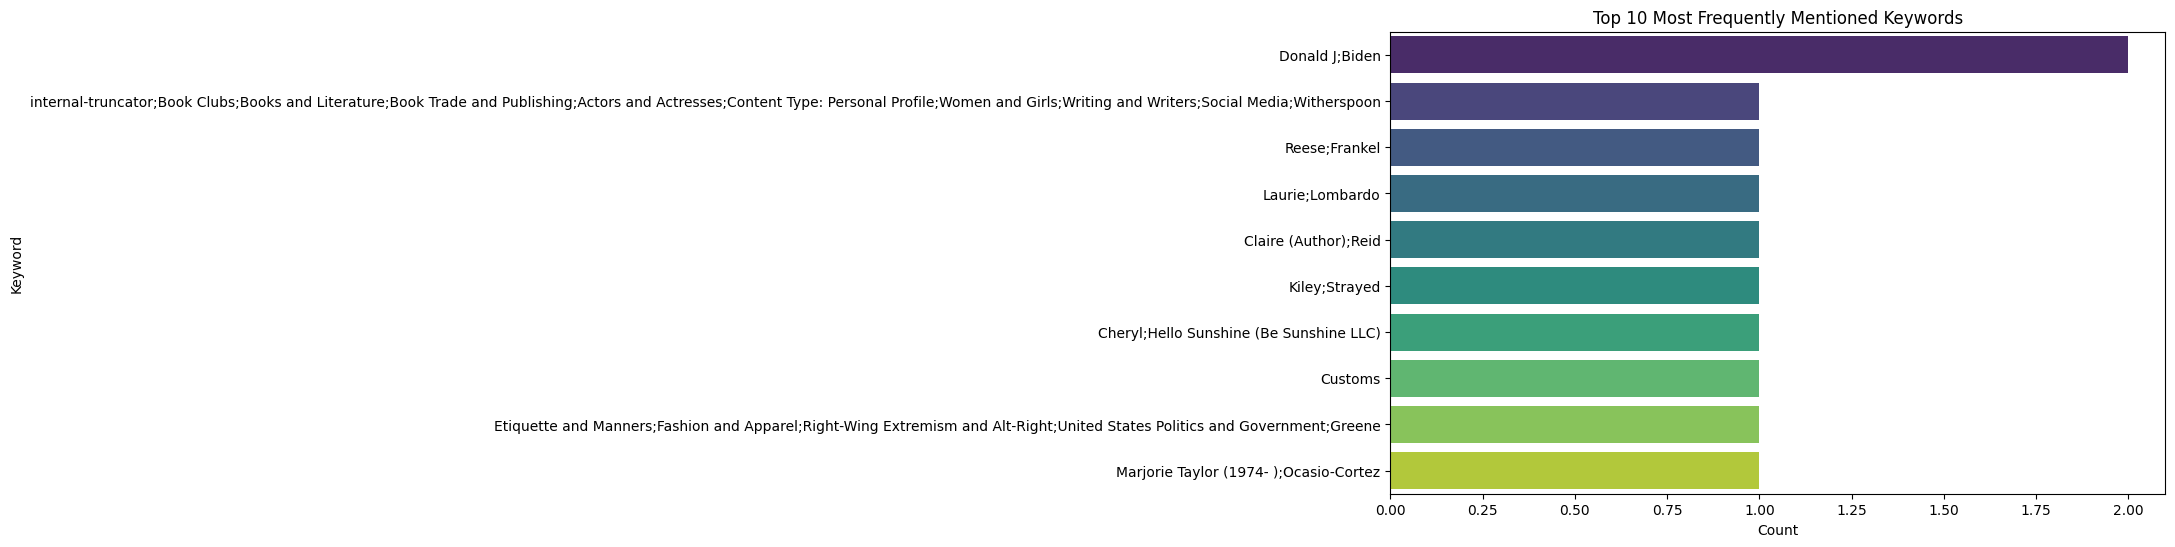

In [39]:
from collections import Counter

# Flatten the list of keywords
all_keywords = [keyword for sublist in nyt_df['keywords'].apply(eval) for keyword in sublist]

# Count the occurrence of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 10 most common keywords
top_keywords = keyword_counts.most_common(10)

# Convert to DataFrame for visualization
top_keywords_df = pd.DataFrame(top_keywords, columns=['keyword', 'count'])

# Plot the top 10 keywords
plt.figure(figsize=(10, 6), facecolor='white')
sns.barplot(x='count', y='keyword', hue='keyword', data=top_keywords_df, dodge=False, palette='viridis')
plt.title('Top 10 Most Frequently Mentioned Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

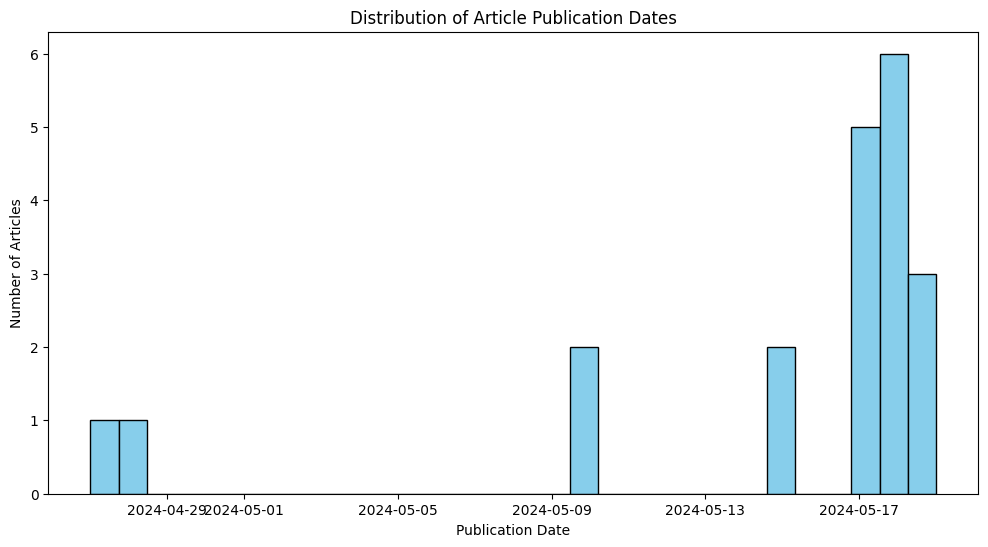

In [43]:
# Convert the publication dates to datetime format
nyt_df['pub_date'] = pd.to_datetime(nyt_df['pub_date'])

# Plot publication dates
plt.figure(figsize=(12, 6), facecolor='white')
nyt_df['pub_date'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Publication Dates')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.grid(False)
plt.show()